In [1]:
import os
from pathlib import Path

project_root = Path.cwd().parent.parent
os.chdir(project_root)
print(os.getcwd())

/homes/dwiersma/Desktop/internship


# Using the best model

In [2]:
import tomllib

from src.ml.cforest import Cforest
from src.data import Data

# load config
with open("config.toml", "rb") as file:
    config = tomllib.load(file)

# load the microarray data (set in config.toml), not important here though
data = Data(config)

data.replace_sample_sep(".")

tcga_data = data.get_mm_with_tt()
tcga_data.columns = tcga_data.columns.str.replace(" ", "_")
print(f"tcga_data shape: {tcga_data.shape}")

2024-01-15 19:24:54,261:src.log_manager:INFO:Loading data...
2024-01-15 19:25:41,384:src.log_manager:INFO:Data loaded in 47.1209 seconds


tcga_data shape: (15403, 9710)


In [3]:
import pandas as pd

tcga_data = pd.read_csv("data/subsets_sorted/tcga_15ct_min100s.csv")

tcga_data = tcga_data.set_index("samples")

tcga_data.columns = tcga_data.columns.str.replace(" ", "_")

tcga_data

,response,consensus_independent_component_1,consensus_independent_component_2,consensus_independent_component_3,consensus_independent_component_4,consensus_independent_component_5,consensus_independent_component_6,consensus_independent_component_7,consensus_independent_component_8,consensus_independent_component_9,...,consensus_independent_component_9700,consensus_independent_component_9701,consensus_independent_component_9702,consensus_independent_component_9703,consensus_independent_component_9704,consensus_independent_component_9705,consensus_independent_component_9706,consensus_independent_component_9707,consensus_independent_component_9708,consensus_independent_component_9709
samples,,,,,,,,,,,,,,,,,,,,,
TCGA.3Z.A93Z.01A.11R.A37O.07,Renal clear cell carcinoma,-1.644787,-0.476637,0.286162,0.278346,-0.765474,-1.825431,0.078206,0.583106,-0.805464,...,0.373512,-1.622997,-0.017680,0.476078,-2.378728,0.063458,-2.398938,-1.996728,1.576878,0.065968
TCGA.6D.AA2E.01A.11R.A37O.07,Renal clear cell carcinoma,-0.437828,-0.190469,0.527258,0.850533,-1.924596,-0.451406,-0.446215,-0.872586,-0.368024,...,-0.027367,0.013079,-0.845817,0.048912,-2.327530,-0.454572,0.066966,-2.783798,-0.363826,2.543796
TCGA.A3.3306.01A.01R.0864.07,Renal clear cell carcinoma,-1.710429,-0.564506,0.647387,1.534057,0.171885,-0.587176,0.196473,-0.474575,-0.078135,...,0.646415,-2.418801,0.211403,-1.203199,-1.236565,-1.066395,-0.275352,-0.972056,1.073813,0.124762
TCGA.A3.3307.01A.01R.0864.07,Renal clear cell carcinoma,-1.646804,-0.490877,0.101629,-1.145772,-1.323385,-0.969075,0.126413,0.526911,-0.984486,...,0.496244,-2.252825,0.412265,0.378643,-1.673397,-0.745501,-0.640898,-1.477185,1.003105,-0.254212
TCGA.A3.3308.01A.02R.1325.07,Renal clear cell carcinoma,-1.822252,0.331602,-0.401601,-0.941509,1.552875,-1.140486,-0.579360,-0.772528,-1.219882,...,0.148591,0.479237,0.691889,1.978726,-0.466635,0.795998,0.152879,-1.394142,-0.305227,-0.995207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.AB.3007.03A.01T.0736.13,Acute myeloid leukemia,1.094287,-0.313363,-0.796430,0.434474,-2.099680,2.174234,-0.116952,0.729825,-0.365611,...,0.041707,1.203984,1.641173,-1.632611,0.315038,-0.184497,1.934734,1.336790,-1.004293,0.005497
TCGA.AB.3008.03A.01T.0736.13,Acute myeloid leukemia,-1.217767,0.897813,1.022496,0.276527,-1.337363,1.748283,-0.575256,0.523173,-0.335799,...,0.761283,-0.407881,0.896583,-0.529505,-1.361658,0.572070,1.277680,1.946415,-0.559852,0.281643
TCGA.AB.3009.03A.01T.0736.13,Acute myeloid leukemia,0.546353,-0.003968,0.915267,0.686188,-1.904293,2.121810,-0.217696,0.634749,-0.516571,...,0.215394,1.591624,1.405799,0.827989,0.197816,0.503274,1.703821,1.780127,-0.068334,0.493166


In [2]:
import pickle as pkl
cforest = Cforest(data)

# ma forest
with open("/students/2023-2024/master/dwiersma/subsets_sorted/20240111112244_c3fb65/cforest_model.pkl", "rb") as file:
    fitted_model = pkl.load(file)

cforest.fitted_model = fitted_model

rpy2.robjects.vectors.ListVector

/homes/dwiersma/.cache/pypoetry/virtualenvs/internship-Uqr7VIlS-py3.12/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
/homes/dwiersma/.cache/pypoetry/virtualenvs/internship-Uqr7VIlS-py3.12/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
2024-01-15 19:42:31,333:src.log_manager:INFO:Performance metrics
AUC-ROC =		0.9959313311870299
MCC =			0.8387500667843106
ARI =			0.8593415342244036
top-3 accuracy =	0.9922297297297298
2024-01-15 19:42:32,922:src.log_manager:INFO:Clustermap saved to /students/2023-2024/master/dwiersma/output/cforest/ma_assessment/clusterma

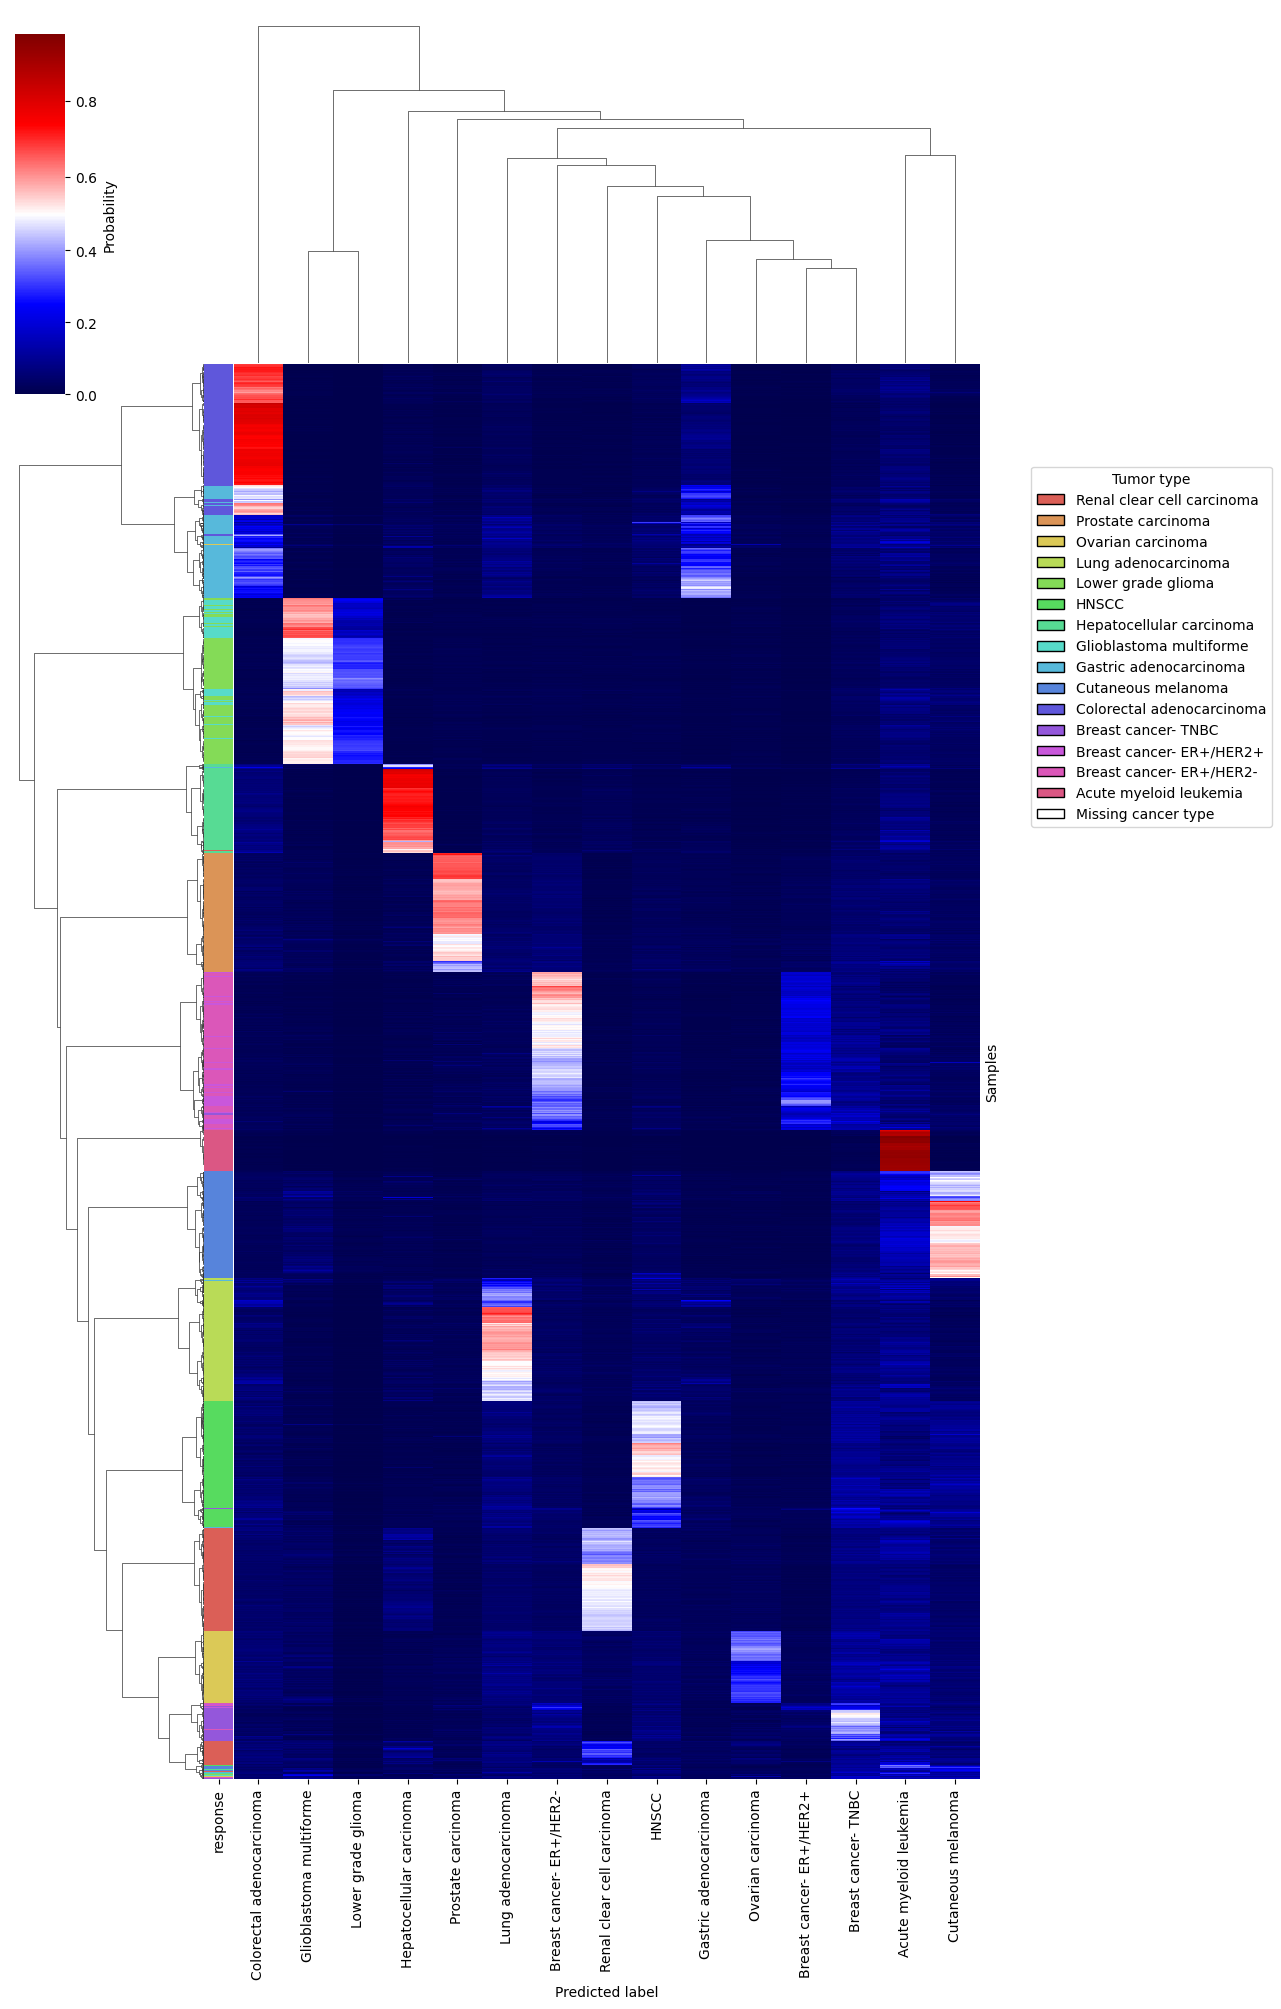

In [5]:
ypredict_probs = cforest.predict(newx=tcga_data.drop(columns=["response"]), type="prob")
ypredict = cforest.predict(newx=tcga_data.drop(columns=["response"]), type="response")
cforest.runID = "ma_assessment"
cforest.assess(ytrue=tcga_data["response"], ypredict=ypredict, ypredict_probs=ypredict_probs, name="clustermap_tcga")

# Feature Importance

Feature importance may be calculated like below, but it may take a while. I shall therefore load it from a file.

In [ ]:
from rpy2 import robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

importr("partykit")
robjects.r.assign("best_forest", cforest.fitted_model)

varimp = pd.DataFrame(robjects.r("data.frame(varimp(best_forest, cores = 50, conditional = FALSE))"))
varimp